In [99]:
# From JMP body measure fore and Bicep
waist = [85.0, 90.5, 80.5, 91.5, 92.0, 101.0, 76.0, 84.0, 74.0, 76.0, 80.0, 86.0, 82.0, 82.0, 95.5, 81.0, 76.0, 84.0, 88.0, 82.0, 96.0, 99.5]
fore = [28.5, 29.5, 25.0, 28.5, 28.5, 30.5, 26.5, 27.0, 26.5, 26.5, 28.5, 27.5, 29.5, 25.0, 29.5, 26.5, 24.0, 25.5, 30.0, 28.0, 29.0, 31.0]
bicep = [33.5, 36.5, 31.0, 34.0, 36.5, 38.0, 29.0, 31.0, 29.0, 31.0, 37.0, 33.0, 36.0, 30.0, 36.0, 32.5, 30.0, 28.5, 34.5, 34.5, 35.5, 33.5]

In [107]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t as t_dist

def pearson_correlation(x,y,alpha=0.05,print_out=True):
    sx,sy=sum(x),sum(y)
    sx2=sum([i*i for i in x])
    sy2=sum([i*i for i in y])
    sxy=sum([i*j for i,j in zip(x,y)])
    n=len(x)
    x_bar,y_bar=sx/n,sy/n
#     r = [n(ΣXY) - (ΣX)(ΣY)] / √[n(ΣX²) - (ΣX)²][n(ΣY²) - (ΣY)²]
    r=(n*sxy-sx*sy)/((n*sx2-sx*sx)*(n*sy2-sy*sy))**.5
#     Cov(X,Y) = Σ[(X - X̄)(Y - Ȳ)] / (n - 1)
    cov=sum([(i-x_bar)*(j-y_bar) for i,j in zip(x,y)])/(n-1)
    ### https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/
    ### below confidence level calc
    r_z = np.arctanh(r)
    se = 1/np.sqrt(n-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
#     Calculate the t-statistic using the formula:
#     t = r * √((n-2) / (1-r²))
#     where n is the sample size
#     Determine the degrees of freedom (df):
#     df = n - 2
    t=r*((n-2)/(1-r*r))**.5
    p=(1-t_dist.cdf(t,n-2))*2
    if print_out:
        print("\nPearson correlation alpha = %.3f"%alpha)
        print("Correlation coefficient: %.3f"%r)
        print("Confidence Interval (%.3f, %.3f)"%(lo,hi))
        print("Covariance: %.3f"%cov)
        print("p-value = %.3f\tN = %d"%(p,n))
        
    return {"r":r,"r_l":lo,"r_u":hi,"cov":cov,"p":p,"N":n}
    

In [84]:
pearson_correlation(waist,bicep)


Pearson correlation alpha = 0.050
Correlation coefficient: 0.665
Confidence level (0.339, 0.849)
Covariance: 15.069
p-value = 0.001	N = 22


{'r': 0.6652037924708464,
 'r_l': 0.33854106090164227,
 'r_u': 0.8487699941631559,
 'cov': 15.068722943722943,
 'p': 0.0007299260603237379,
 'N': 22}

In [31]:
 stats.pearsonr(waist,bicep)

PearsonRResult(statistic=0.6652037924708466, pvalue=0.0007299260603236711)

The main differences between orthogonal regression (also known as orthogonal fit or total least squares) and linear regression (also known as ordinary least squares) are:

1. Error assumptions:
   - Linear regression assumes errors only in the dependent variable (Y).
   - Orthogonal regression assumes errors in both the dependent (Y) and independent (X) variables[1][2].

2. Distance minimization:
   - Linear regression minimizes the vertical distances between data points and the fitted line.
   - Orthogonal regression minimizes the perpendicular distances between data points and the fitted line[1][2].

3. Slope calculation:
   - Linear regression typically produces a different slope compared to orthogonal regression.
   - Orthogonal regression often results in a steeper slope than linear regression[2][4].

4. Appropriateness:
   - Linear regression is suitable when only the Y variable has measurement error.
   - Orthogonal regression is more appropriate when both X and Y variables have measurement errors[1][2].

5. Variance ratio:
   - Orthogonal regression requires specifying or estimating the ratio of error variances between X and Y variables.
   - Linear regression does not consider error variance in the X variable[2][4].

6. Interpretation:
   - In orthogonal regression, the slope represents the correlation between variables rather than a causal relationship.
   - Linear regression slope is often interpreted as the change in Y for a unit change in X[1].

7. Sample size requirements:
   - Orthogonal regression typically requires larger sample sizes than linear regression for reliable results[1].

8. Sensitivity:
   - Orthogonal regression results can be quite sensitive to the choice of variance ratio[4][5].

When both variables have measurement errors and the relationship between them is of primary interest, orthogonal regression may provide a more accurate representation of the true relationship. However, linear regression remains more commonly used due to its simplicity and well-established statistical properties.

Citations:
[1] https://www.isixsigma.com/dictionary/maximizing-results-with-the-help-of-orthogonal-regression/
[2] https://community.jmp.com/t5/Discussions/Different-slopes-between-lin-regression-and-main-axis-of-density/td-p/64954
[3] https://stats.stackexchange.com/questions/431542/difference-between-orthogonal-distance-regression-and-total-least-squares
[4] https://www.researchgate.net/publication/311778723_Comparison_of_Classical_Linear_Regression_and_Orthogonal_Regression_with_Respect_to_the_Sum_of_Squared_Perpendicular_Distances
[5] https://www.youtube.com/watch?v=ajgAGF-rmtE

The orthogonal fit ratio, also known as the error variance ratio, is an important parameter in orthogonal regression. Here are the key points about the orthogonal fit ratio:

1. Definition: It is the ratio of the error variance in the dependent variable (Y) to the error variance in the independent variable (X).

2. Formula: Error variance ratio = Var(error in Y) / Var(error in X)

3. Purpose: It specifies the relative uncertainty in the measurements of X and Y.

4. Default value: When not specified, the ratio is often assumed to be 1, implying equal error variances in X and Y.

5. Effect on fit: The ratio influences the slope of the fitted line. A higher ratio gives more weight to errors in X, resulting in a steeper slope.

6. When to specify: It should be specified when there's known or estimated difference in measurement precision between X and Y variables.

7. Estimation: If unknown, it can sometimes be estimated from replicate measurements or knowledge of the measurement processes.

8. Sensitivity: The results of orthogonal regression can be quite sensitive to the choice of this ratio.

9. Special cases:
   - Ratio = 0: Equivalent to ordinary least squares regression of Y on X
   - Ratio = ∞: Equivalent to ordinary least squares regression of X on Y

10. Interpretation: A ratio > 1 indicates more uncertainty in Y measurements, while a ratio < 1 indicates more uncertainty in X measurements.

11. Importance: Correctly specifying this ratio is crucial for obtaining accurate results in orthogonal regression.

12. Software implementation: Many statistical software packages that perform orthogonal regression require the user to input this ratio.

Understanding and correctly specifying the orthogonal fit ratio is essential for proper application of orthogonal regression, especially in fields like method comparison studies or when both variables are subject to measurement error.

Citations:
[1] https://community.jmp.com/kvoqx44227/attachments/kvoqx44227/twin-cities-jug/35/1/2021-02-19-Orthogonal%20Correlation%20JMP%20User%20Community.pdf
[2] https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/regression/how-to/orthogonal-regression/interpret-the-results/all-statistics-and-graphs/coefficients-and-error-variances/
[3] https://cdn2.hubspot.net/hubfs/402067/PDFs/Orthogonal_Regression.pdf
[4] https://de.mathworks.com/help/stats/fitting-an-orthogonal-regression-using-principal-components-analysis.html
[5] https://blog.minitab.com/en/real-world-quality-improvement/orthogonal-regression-testing-the-equivalence-of-instruments

In [82]:
import numpy as np

def orthogonal_fit(x, y, error_ratio=1.0,alpha=0.05,
                  print_out=True):
    """
    Perform orthogonal fit with unequal variances.
    
    Parameters:
    x, y: arrays of data points
    error_ratio: ratio of error variances (var_y / var_x)
    Ratio here is the ratio of measurement variance not the 
    data variance itself. So setting the ratio is 1 as default
    
    Returns:
    slope, intercept
    and the CI of them
    All the results are same to Minitab 20
    slope and int have same 3~4 digits with JMP, CIs are different w/JMP
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_centered = x - x_mean
    y_centered = y - y_mean
       
    n=len(x)
    Sxx = np.sum(x_centered**2)/(n-1)
    Syy = np.sum(y_centered**2)/(n-1)
    Sxy = np.sum(x_centered * y_centered)/(n-1)

    
    # Modified slope calculation incorporating error_ratio
    w = error_ratio
    b1=slope = ((Syy - w*Sxx) + np.sqrt((Syy - w*Sxx)**2 + 4*w*Sxy**2))/ (2*Sxy)
    
    b0=intercept = y_mean - slope * x_mean
    
####### Confidence Intervals    
#   Source: https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/regression/how-to/orthogonal-regression/methods-and-formulas/methods-and-formulas/
# The code below replicated the minitab math,
# the confidence interval outputs are not same to JMP but MiniTab 20

    var_u = (Syy+w*Sxx-((Syy-w*Sxx)**2 + 4*w*Sxy**2)**.5)/2/w
    var_e = w * var_u
    # above noted as est. delta ^2 u and est. delta ^2 e
    if Sxy==0 and Syy<w*Sxx:
        var_u = Syy/w
    
    var_xx=(((Syy-w*Sxx)**2+4*w*Sxy**2)**.5-(Syy-w*Sxx))/2/w
    if Sxy==0 and Syy<w*Sxx:
        var_xx=Sxx-Syy/w
    
    Svv=(n-1)*(w+slope**2)*var_u/(n-2)
    
    v_slope=(var_xx*Svv+var_u*Svv-slope**2*var_u**2)/(n-1)/var_xx**2
    
    z=norm.ppf(1-alpha/2)
    slope_l=slope-z*(v_slope)**.5
    slope_u=slope+z*(v_slope)**.5
    
    v_int=Svv/n+x_mean**2*v_slope
    int_l=intercept-z*(v_int)**.5
    int_u=intercept+z*(v_int)**.5
    
    ######### Fitted values ############
    x_est=[(w*xt+(yt-b0)*b1)/(b1*b1+w) 
          for xt,yt in zip(x,y)]
    y_est=[b0+b1*xt for xt in x_est]
    ######### Residuals
    vt_est=[yt-b0-xt*b1 for xt,yt in zip(x,y)]
    ######### Std. Residuals
    std_vt_est=[vt/((w+b1*b1)*var_u)**.5 
               for vt in vt_est]
    
    if print_out:
        print("Orthogonal Regression alpha = %.3f"%alpha)
        print("Error Variance Ratio %.3f"%w)
        print("Slope %.3f CI(%.3f, %.3f)"%(b1,slope_l,slope_u))
        print("Intercept %.3f CI(%.3f, %.3f)"%(b0,int_l,int_u))
    
    return {"slope":slope, "intercept":intercept, 
            "slope_l":slope_l,"slope_u":slope_u,
            "int_l":int_l,"int_u":int_u,
           "Fitted Y":y_est, "Fitted X":x_est,
           "Residuals":vt_est,"St Resid":std_vt_est}
            

orthogonal_fit(waist, bicep, error_ratio=.139)



Orthogonal Regression alpha = 0.050
Error Variance Ratio 0.139
Slope 0.373 CI(0.189, 0.557)
Intercept 1.310 CI(-14.488, 17.108)


{'slope': 0.3727401622888784,
 'intercept': 1.3098474768721111,
 'slope_l': 0.18850324925919187,
 'slope_u': 0.556977075318565,
 'int_l': -14.48781223797447,
 'int_u': 17.107507191718692,
 'Fitted Y': [33.246321530987245,
  35.771246289164665,
  31.157752025319496,
  34.70795110918249,
  36.05086655980618,
  38.47841339990123,
  29.31912425840037,
  31.810199323483054,
  28.946297230878343,
  30.318891213394924,
  34.06384613342263,
  33.182793305999624,
  33.93678968344739,
  30.937488818463745,
  36.4533721192211,
  32.00078399844591,
  29.81900773589765,
  30.560490629739864,
  34.30544554976757,
  33.186964467201484,
  36.296637137352974,
  35.949317480521984],
 'Fitted X': [85.68026009862592,
  92.45421421903156,
  80.07697470849646,
  89.60156970266708,
  93.20438900278563,
  99.71709432863048,
  75.14424152614043,
  81.82738253725601,
  74.14400848113499,
  77.8264503572342,
  87.87354294052636,
  85.5098244133552,
  87.53267156998494,
  79.48604507670368,
  94.28424462377174,
 

In [ ]:
import statistics as stat

print(stat.variance(waist),stat.variance(bicep))

In [69]:
stats.norm.ppf(.975)

1.959963984540054

Based on the search results and best practices in orthogonal regression, here's guidance on whether to use equal variance or a calculated variance ratio for orthogonal fit:

1. Equal variance (ratio = 1):
   - Use when you have no prior knowledge about the relative measurement errors in X and Y variables.
   - Appropriate when the measurement methods for X and Y are the same or similar.
   - Can be a reasonable default when the range of measurements is large compared to the measurement error.

2. Calculated variance ratio:
   - Preferred when you have information about the relative measurement errors in X and Y.
   - More accurate when there's a known difference in measurement precision between X and Y variables.
   - Can be estimated through:
     a) Replicate measurements: Perform separate studies on each variable to estimate measurement variation.
     b) Gage Repeatability and Reproducibility (R&R) studies: Calculate the ratio of variance components for repeatability.

3. Considerations for choosing:
   - Data quality: If you have high-quality data on measurement errors, use a calculated ratio.
   - Sample size: With larger samples, the choice becomes less critical as results tend to converge.
   - Sensitivity: If results are highly sensitive to the ratio, it's crucial to estimate it accurately.

4. Best practice:
   - When possible, estimate the variance ratio rather than assuming equal variances.
   - Report and justify your choice of ratio in your analysis.
   - Perform a sensitivity analysis by trying different ratios to see how it affects your results.

5. Special cases:
   - In method comparison studies, if one method is considered a "gold standard," give it a lower error variance.
   - For physical measurements, consider the precision of the measuring instruments.

In conclusion, while using equal variance (ratio = 1) can be a reasonable default, calculating the variance ratio based on your specific data and measurement processes will generally provide more accurate results. If you have the means to estimate the error variances, it's recommended to do so and use the calculated ratio in your orthogonal fit.

Citations:
[1] https://analyse-it.com/docs/user-guide/method-comparison/deming-regression
[2] https://blog.minitab.com/en/orthogonal-regression-for-instrument-calibration
[3] https://bookdown.org/pingapang9/linear_models_bookdown/assumptions.html
[4] https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/regression/how-to/orthogonal-regression/interpret-the-results/all-statistics-and-graphs/coefficients-and-error-variances/
[5] https://blog.minitab.com/en/real-world-quality-improvement/orthogonal-regression-testing-the-equivalence-of-instruments
[6] https://stats.stackexchange.com/questions/134589/regression-with-measurement-errors-in-x-and-y
[7] https://cdn2.hubspot.net/hubfs/402067/PDFs/Orthogonal_Regression.pdf

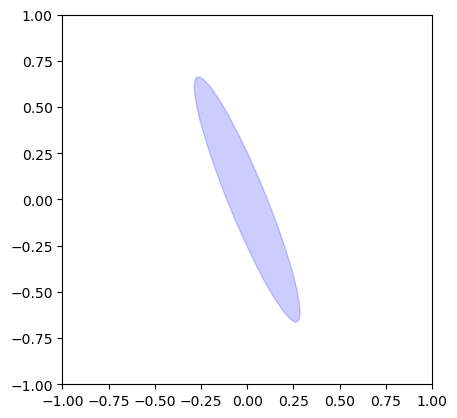

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def correlation_ellipse(r, n, confidence=0.95):
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + confidence) / 2)
    z_ci = z + np.array([-1, 1]) * z_crit * se
    r_ci = np.tanh(z_ci)
    
    major = np.abs(r_ci[1] - r_ci[0])
    minor = 2 * np.sqrt(1 - r**2)
    angle = np.degrees(np.arctan(r / np.sqrt(1 - r**2)) / 2)
    
    return Ellipse((0, 0), major, minor, angle=angle,
                  alpha=0.2,color='b')

# Example usage
r = 0.7  # correlation coefficient
n = 100  # sample size

fig, ax = plt.subplots()
ax.add_patch(correlation_ellipse(r, n))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
plt.show()

In [91]:
def fit_plot(x,y,alpha=0.05,print_out=True,
            pearson=True,ellipse=True,
            ortho=False,ortho_ratio=1,
            show_plot=False,filename=None,
            xlabel=None,ylabel=None):

SyntaxError: incomplete input (2750290537.py, line 5)

In [92]:
def linear_fit(x,y,print_out=True,

SyntaxError: incomplete input (2608040218.py, line 1)

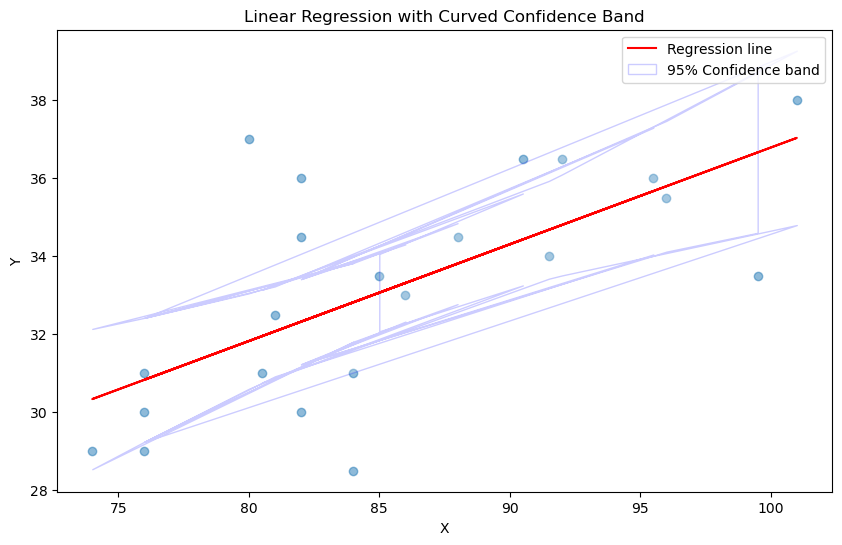

[0.47532793 0.56471184 0.56936934 0.60081547 0.6204226  1.07103396
 0.76111827 0.48395428 0.86199905 0.76111827 0.58718069 0.47477199
 0.52345262 0.52345262 0.7789527  0.55273724 0.76111827 0.48395428
 0.49758693 0.52345262 0.80386944 0.98818309]


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data
np.random.seed(0)
x = np.array(waist)
y = np.array( bicep)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate predicted values
y_pred = intercept + slope * x

# Calculate standard error of the regression
n = len(x)
y_err = y - y_pred
MSE = np.sum(y_err**2) / (n - 2)

# Calculate standard error of the prediction
SE = np.sqrt(MSE * (1/n + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# Calculate confidence intervals
t_value = stats.t.ppf(0.975, n - 2)
ci = t_value * SE

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred, color='red', label='Regression line')
plt.fill_between(x, y_pred - ci, y_pred + ci, alpha=0.2,color='white',edgecolor='b', label='95% Confidence band')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression with Curved Confidence Band')
plt.show()
print(SE)

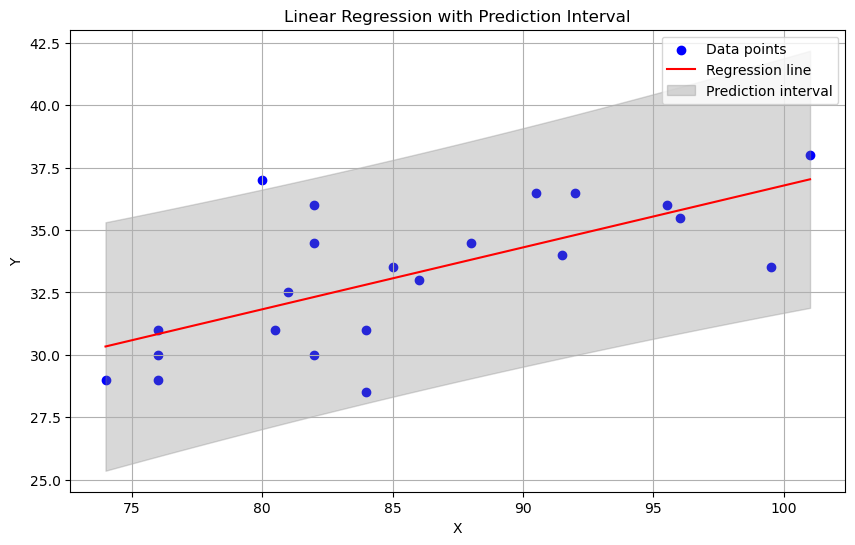

Predictions with 95% prediction intervals:
x = 2.0: y = 12.48 (0.64, 24.32)
x = 3.5: y = 12.85 (1.19, 24.52)
x = 4.7: y = 13.15 (1.63, 24.67)


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data
x = np.array(waist)
y = np.array(bicep)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Function to calculate prediction interval
def prediction_interval(x, y, x_pred, confidence=0.95):
    n = len(x)
    x_mean = np.mean(x)
    
    # Calculate predicted y
    y_pred = slope * x_pred + intercept
    
    # Calculate residuals and standard error
    residuals = y - (slope * x + intercept)
    std_error = np.sqrt(np.sum(residuals**2) / (n - 2))
    
    # Calculate prediction interval
    t_value = stats.t.ppf((1 + confidence) / 2, n - 2)
    se_pred = std_error * np.sqrt(1 + 1/n + (x_pred - x_mean)**2 / np.sum((x - x_mean)**2))
    margin_error = t_value * se_pred
    
    return y_pred, y_pred - margin_error, y_pred + margin_error

# Generate points for the regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = slope * x_line + intercept

# Calculate prediction intervals for each point
y_pred, lower_bound, upper_bound = [], [], []
for xi in x_line:
    pred, lower, upper = prediction_interval(x, y, xi)
    y_pred.append(pred)
    lower_bound.append(lower)
    upper_bound.append(upper)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', label='Regression line')
plt.fill_between(x_line, lower_bound, upper_bound, color='gray', alpha=0.3, label='Prediction interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Prediction Interval')
plt.legend()
plt.grid(True)
plt.show()

# Print some example predictions with intervals
print("Predictions with 95% prediction intervals:")
for xi in [2, 3.5, 4.7]:
    pred, lower, upper = prediction_interval(x, y, xi)
    print(f"x = {xi:.1f}: y = {pred:.2f} ({lower:.2f}, {upper:.2f})")